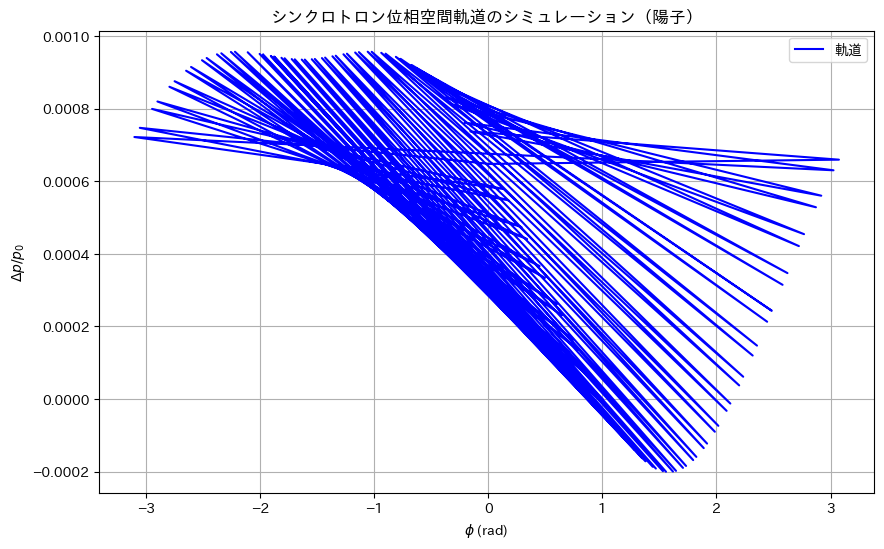

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 定数の定義
eV = 1.602e-19  # 電子ボルトのジュール換算
m_p = 1.6726e-27  # 陽子の質量（kg）
c = 3e8  # 光速（m/s）
E_0 = 45e6 * eV  # 初期運動エネルギー（45 MeV）
phi_s = np.deg2rad(0)  # 位相（30度をラジアンに変換）
alpha_c = 0.04340
h = 1
V = 1e5 * eV  # 電圧（100kV）
gamma = E_0 / (m_p * c**2) + 1  # 相対論的因子
beta = np.sqrt(1 - 1 / gamma**2)
eta = alpha_c - 1 / gamma**2
p_0 = np.sqrt((E_0 + m_p * c**2)**2 - (m_p * c**2)**2) / c  # 初期運動量

# シミュレーションの設定
n_turns = 100  # シミュレーションのターン数
phi = np.zeros(n_turns)
phi[0] = 1  # 初期位相
delta_E = np.zeros(n_turns)

# 位相空間マッピング方程式の実装
for n in range(n_turns - 1):
    delta_E[n+1] = delta_E[n] + V * (np.sin(phi[n]) - np.sin(phi_s))
    phi[n+1] = phi[n] + (2 * np.pi * h * eta / (beta**2 * E_0)) * delta_E[n+1]
    phi[n+1] = np.mod(phi[n+1], 2 * np.pi) -np.pi  # 位相を0から2πの範囲に制限

# 運動量変化の計算
delta_p = delta_E / (beta * c)  # 運動量の変化

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(phi, delta_p / p_0, 'b-', label='軌道')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\Delta p / p_0$')
plt.title('シンクロトロン位相空間軌道のシミュレーション（陽子）')
plt.legend()
plt.grid(True)
plt.show()

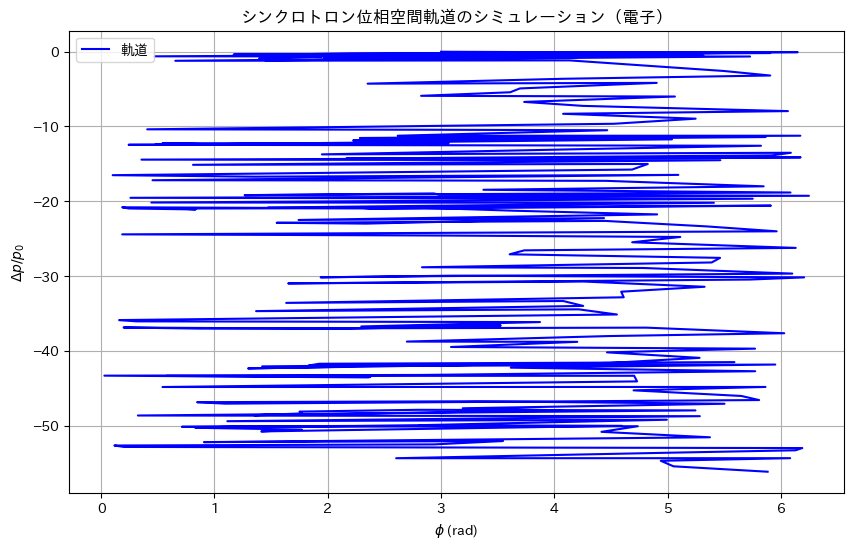

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 定数の定義
eV = 1.602e-19  # 電子ボルトのジュール換算
m_p = 9.10938356e-31  # 電子の質量（kg）
c = 3e8  # 光速（m/s）
E_0 = 1.5e3 * eV  # 初期運動エネルギー（1.5eV）
phi_s = np.deg2rad(30)  # 位相（30度をラジアンに変換）
alpha_c = 0.04340
h = 1
V = 1.5e3 * eV  # 電圧（1.5 keV）
gamma = E_0 / (m_p * c**2) + 1  # 相対論的因子
beta = np.sqrt(1 - 1 / gamma**2)
eta = alpha_c - 1 / gamma**2
p_0 = np.sqrt((E_0 + m_p * c**2)**2 - (m_p * c**2)**2) / c  # 初期運動量

# シミュレーションの設定
n_turns = 100  # シミュレーションのターン数
phi = np.zeros(n_turns)
phi[0] = 3
delta_E = np.zeros(n_turns)

# 位相空間マッピング方程式の実装
for n in range(n_turns - 1):
    delta_E[n+1] = delta_E[n] + V * (np.sin(phi[n]) - np.sin(phi_s))
    phi[n+1] = phi[n] + (2 * np.pi * h * eta / (beta**2 * E_0)) * delta_E[n+1]
    phi[n+1] = np.mod(phi[n+1], 2 * np.pi)  # 位相を0から2πの範囲に制限

# 運動量変化の計算
delta_p = delta_E / (beta * c)  # 運動量の変化

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(phi, delta_p / p_0, 'b-', label='軌道')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\Delta p / p_0$')
plt.title('シンクロトロン位相空間軌道のシミュレーション（電子）')
plt.legend()
plt.grid(True)
plt.show()